## Introduction:
Robots are smart… by design. To fully understand and properly navigate a task, however, they need input about their environment.
In this competition, you’ll help robots recognize the floor surface they’re standing on using data collected from Inertial Measurement Units (IMU sensors).

## About Data: 
CareerCon has collected IMU sensor data while driving a small mobile robot over different floor surfaces on the university premises. 

## Objective:
The task is to predict which one of the nine floor types (carpet, tiles, concrete) the robot is on using sensor data such as acceleration and velocity. Succeed and you'll help improve the navigation of robots without assistance across many different surfaces, so they won’t fall down on the job.


In [2]:
!pip install plotly

     |████████████████████████████████| 13.2 MB 12.0 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=29ad3b1aac4224d5d2f36b131fb0993729abbaff547aa77e4242a8c1819e13ac
  Stored in directory: /home/akansh/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
You should consider upgrading via the '/home/akansh/anaconda3/bin/python -m pip install --upgrade pip' command.


In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../"))

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style 
style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

import plotly.offline as py 
from plotly.offline import init_notebook_mode, iplot
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot

from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix
import gc


# Any results you write to the current directory are saved as output.

['career-con-2019', 'help_robots_help_humanity', 'career-con-2019.zip']


In [17]:
# X_train = pd.read_csv('./X_train.csv')
X_train.drop(['series_id', 'row_id', 'measurement_number'], axis = 1)

,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,-0.75853,-0.63435,-0.104880,-0.105970,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,-0.75853,-0.63434,-0.104900,-0.106000,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128
2,-0.75853,-0.63435,-0.104920,-0.105970,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,-0.75852,-0.63436,-0.104950,-0.105970,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
4,-0.75852,-0.63435,-0.104950,-0.105960,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410
...,...,...,...,...,...,...,...,...,...,...
487675,0.62871,-0.76878,-0.084391,0.081093,0.003167,0.093760,-0.142740,3.27180,2.0115,-9.0063
487676,0.62884,-0.76868,-0.084365,0.081099,0.014994,0.032637,-0.132380,4.42750,3.0696,-8.1257
487677,0.62891,-0.76861,-0.084345,0.081178,-0.031184,-0.003961,-0.138940,2.70480,4.2622,-8.1443
487678,0.62903,-0.76850,-0.084414,0.081231,-0.069153,0.013229,-0.130210,2.54100,4.7130,-9.4435


In [3]:
y_train = pd.read_csv('./y_train.csv')
y_train.head(3)

,series_id,group_id,surface
0,0,13,fine_concrete
1,1,31,concrete
2,2,20,concrete


# Descriptive Statistics

In [4]:
print('Size of Train Data')
print('Number of samples are: {0}\nNumber of features are: {1}'.format(X_train.shape[0], X_train.shape[1]))

# print('\nSize of Test Data')
# print('Number of samples are: {0}\nNumber of features are: {1}'.format(X_test.shape[0], X_test.shape[1]))

print('\nSize of Target Data')
print('Number of samples are: {0}\nNumber of features are: {1}'.format(y_train.shape[0], y_train.shape[1]))

Size of Train Data
Number of samples are: 487680
Number of features are: 13

Size of Target Data
Number of samples are: 3810
Number of features are: 3


## Train Data Description

In [5]:
X_train.describe()

,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
count,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000
mean,1904.500000,63.500000,-0.018050,0.075062,0.012458,-0.003804,0.000178,0.008338,-0.019184,0.129281,2.886468,-9.364886
std,1099.853353,36.949327,0.685696,0.708226,0.105972,0.104299,0.117764,0.088677,0.229153,1.870600,2.140067,2.845341
min,0.000000,0.000000,-0.989100,-0.989650,-0.162830,-0.156620,-2.371000,-0.927860,-1.268800,-36.067000,-121.490000,-75.386000
25%,952.000000,31.750000,-0.705120,-0.688980,-0.089466,-0.106060,-0.040752,-0.033191,-0.090743,-0.530833,1.957900,-10.193000
50%,1904.500000,63.500000,-0.105960,0.237855,0.031949,-0.018704,0.000084,0.005412,-0.005335,0.124980,2.879600,-9.365300
75%,2857.000000,95.250000,0.651803,0.809550,0.122870,0.097215,0.040527,0.048068,0.064604,0.792263,3.798800,-8.522700
max,3809.000000,127.000000,0.989100,0.988980,0.155710,0.154770,2.282200,1.079100,1.387300,36.797000,73.008000,65.839000


## Target surface type and their sample count

In [10]:
target = y_train['surface'].value_counts().reset_index().rename(columns = {'index' : 'target'})
target

,target,surface
0,concrete,779
1,soft_pvc,732
2,wood,607
3,tiled,514
4,fine_concrete,363
5,hard_tiles_large_space,308
6,soft_tiles,297
7,carpet,189
8,hard_tiles,21


In [12]:
#sns.countplot(y='surface',data = y_train)
trace0 = go.Bar(
    x = y_train['surface'].value_counts().index,
    y = y_train['surface'].value_counts().values
    )

trace1 = go.Pie(
    labels = y_train['surface'].value_counts().index,
    values = y_train['surface'].value_counts().values,
    domain = {'x':[0.55,1]})

data = [trace0,trace1]
layout = go.Layout(
    title = 'Frequency Distribution for surface/target data',
    xaxis = dict(domain = [0,.50]))

fig = go.Figure(data = data, layout = layout)
py.iplot(fig)


## Preprocessing data

### Is there any missing data?

In [12]:
X_train.isnull().sum()

row_id                   0
series_id                0
measurement_number       0
orientation_X            0
orientation_Y            0
orientation_Z            0
orientation_W            0
angular_velocity_X       0
angular_velocity_Y       0
angular_velocity_Z       0
linear_acceleration_X    0
linear_acceleration_Y    0
linear_acceleration_Z    0
dtype: int64

#### Observation: No missing data

### Is there any duplicate data?

In [13]:
X_train['is_duplicate'] = X_train.duplicated()
X_train['is_duplicate'].value_counts()

False    487680
Name: is_duplicate, dtype: int64

#### Observation: There is no duplicate data

In [14]:
X_train = X_train.drop(['is_duplicate'], axis = 1)

## WHY

### Sorting based on series_id and measurement_number

In [15]:
X_train_sort = X_train.sort_values(by = ['series_id', 'measurement_number'], ascending = True)
X_train_sort.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410


### Correlation Matrix

In [17]:
corr = X_train.corr()
corr

,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
series_id,1.000000,0.000000,-0.025213,0.218922,0.228806,-0.040847,-0.001697,-0.017005,0.024366,-0.001004,-0.008999,-0.001919
measurement_number,0.000000,1.000000,-0.000336,0.000604,0.000607,-0.000334,-0.000334,0.000963,0.001108,-0.002214,-0.002329,-0.001096
orientation_X,-0.025213,-0.000336,1.000000,-0.185716,-0.134168,0.998371,0.001501,0.046975,-0.058494,-0.002549,-0.009602,-0.002100
orientation_Y,0.218922,0.000604,-0.185716,1.000000,0.997529,-0.226161,0.000572,0.021131,-0.025720,-0.003879,0.011973,0.002497
orientation_Z,0.228806,0.000607,-0.134168,0.997529,1.000000,-0.176360,0.000456,0.023197,-0.028233,-0.004182,0.009763,0.001879
orientation_W,-0.040847,-0.000334,0.998371,-0.226161,-0.176360,1.000000,0.001525,0.046574,-0.058065,-0.002914,-0.008816,-0.001908
angular_velocity_X,-0.001697,-0.000334,0.001501,0.000572,0.000456,0.001525,1.000000,-0.086157,-0.016212,-0.002572,-0.019442,-0.034650
angular_velocity_Y,-0.017005,0.000963,0.046975,0.021131,0.023197,0.046574,-0.086157,1.000000,-0.761510,-0.027275,0.015518,0.004421
angular_velocity_Z,0.024366,0.001108,-0.058494,-0.025720,-0.028233,-0.058065,-0.016212,-0.761510,1.000000,0.029005,0.000550,-0.001220
linear_acceleration_X,-0.001004,-0.002214,-0.002549,-0.003879,-0.004182,-0.002914,-0.002572,-0.027275,0.029005,1.000000,0.052889,0.016459


Text(0.5, 0.98, 'Orientation, Angular_velocity and Linear_accelaration Correlation Heatmap for Train dataset')

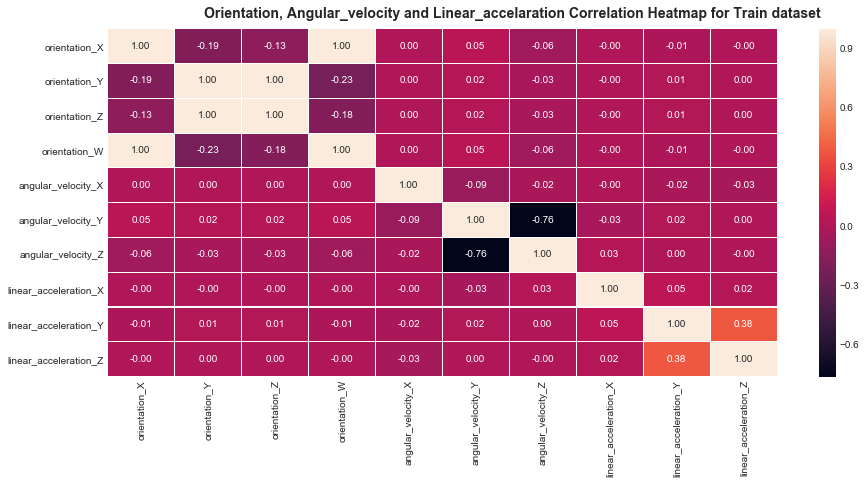

In [21]:
fig, ax = plt.subplots(1,1, figsize = (15,6))

hm = sns.heatmap(X_train.iloc[:,3:].corr(),
                ax = ax,
                annot = True,
                fmt = '.2f',
                linewidths = 0.05)
fig.subplots_adjust(top=0.93)
fig.suptitle('Orientation, Angular_velocity and Linear_accelaration Correlation Heatmap for Train dataset', 
              fontsize=14, 
              fontweight='bold')

**Observation:**
*     orientation_X and orientation_W are strongly correlated
*     orientation_Y and orientation_Z are strongly correlated
*     linear_accelaration_Y and linear_accelaration_Z also has positive correlation
*     angular_velocity_Y and angular_velocity_Z has negative correlation

### Box plot of angular_velocity, orientation and linear_accelaration data

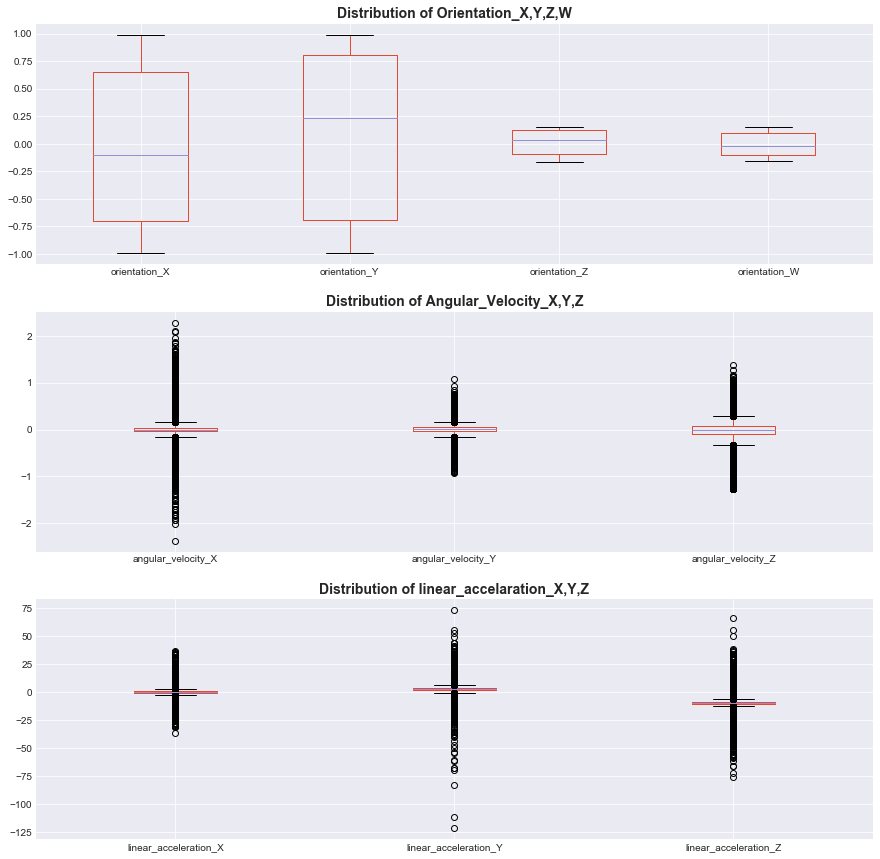

In [23]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(311)
ax.set_title('Distribution of Orientation_X,Y,Z,W',
             fontsize=14, 
             fontweight='bold')
X_train.iloc[:,3:7].boxplot()
ax = fig.add_subplot(312)
ax.set_title('Distribution of Angular_Velocity_X,Y,Z',fontsize=14, 
             fontweight='bold')
X_train.iloc[:,7:10].boxplot()
ax = fig.add_subplot(313)
ax.set_title('Distribution of linear_accelaration_X,Y,Z',fontsize=14, 
             fontweight='bold')
X_train.iloc[:,10:13].boxplot()

**Observation**: There are many outliers in angular_velocity and linear accelaration data

### Histogram plot for all features

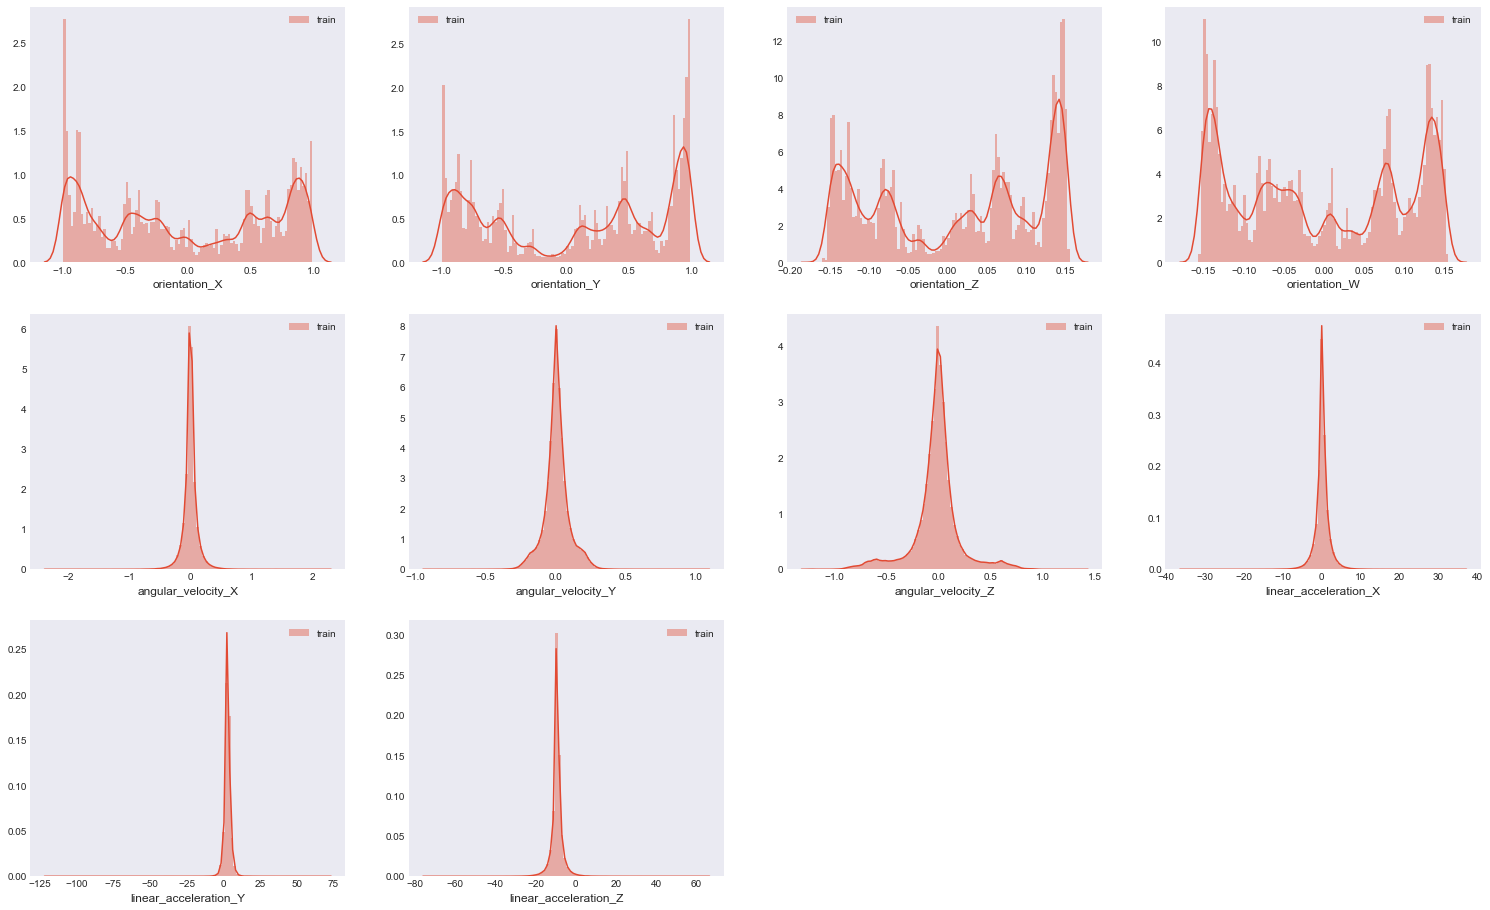

In [25]:
plt.figure(figsize=(26, 16))
for i, col in enumerate(X_train.columns[3:]):
    ax = plt.subplot(3, 4, i + 1)
    sns.distplot(X_train[col], bins=100, label='train')
#     sns.distplot(X_test[col], bins=100, label='test')
    ax.legend()   

### Observation:
*    Angular velocity are normally distributed infect they are symmetrical data distribution
*    linear_accelaration are normally distributed/symmetrical distribution but average value is slightly negative for linear_accelaration_Z
*    X,Y,Z,W orientation data are not symmetrical or bell shaped distributed. 
*         X,Y orientation data are distributed un-even between 1 to -1.
*         Z,W orientation data are distributed un-even between 1.5 to -1.5

Since orientation data is not linearly distributed, taking log of the orientation data may improve the results.

### Feature distribution for each target value (surface)

In [26]:
df = X_train.merge(y_train, on = 'series_id', how = 'inner')
targets = (y_train['surface'].value_counts()).index

In [27]:
df.head(3)

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,group_id,surface
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532,13,fine_concrete
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128,13,fine_concrete
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267,13,fine_concrete


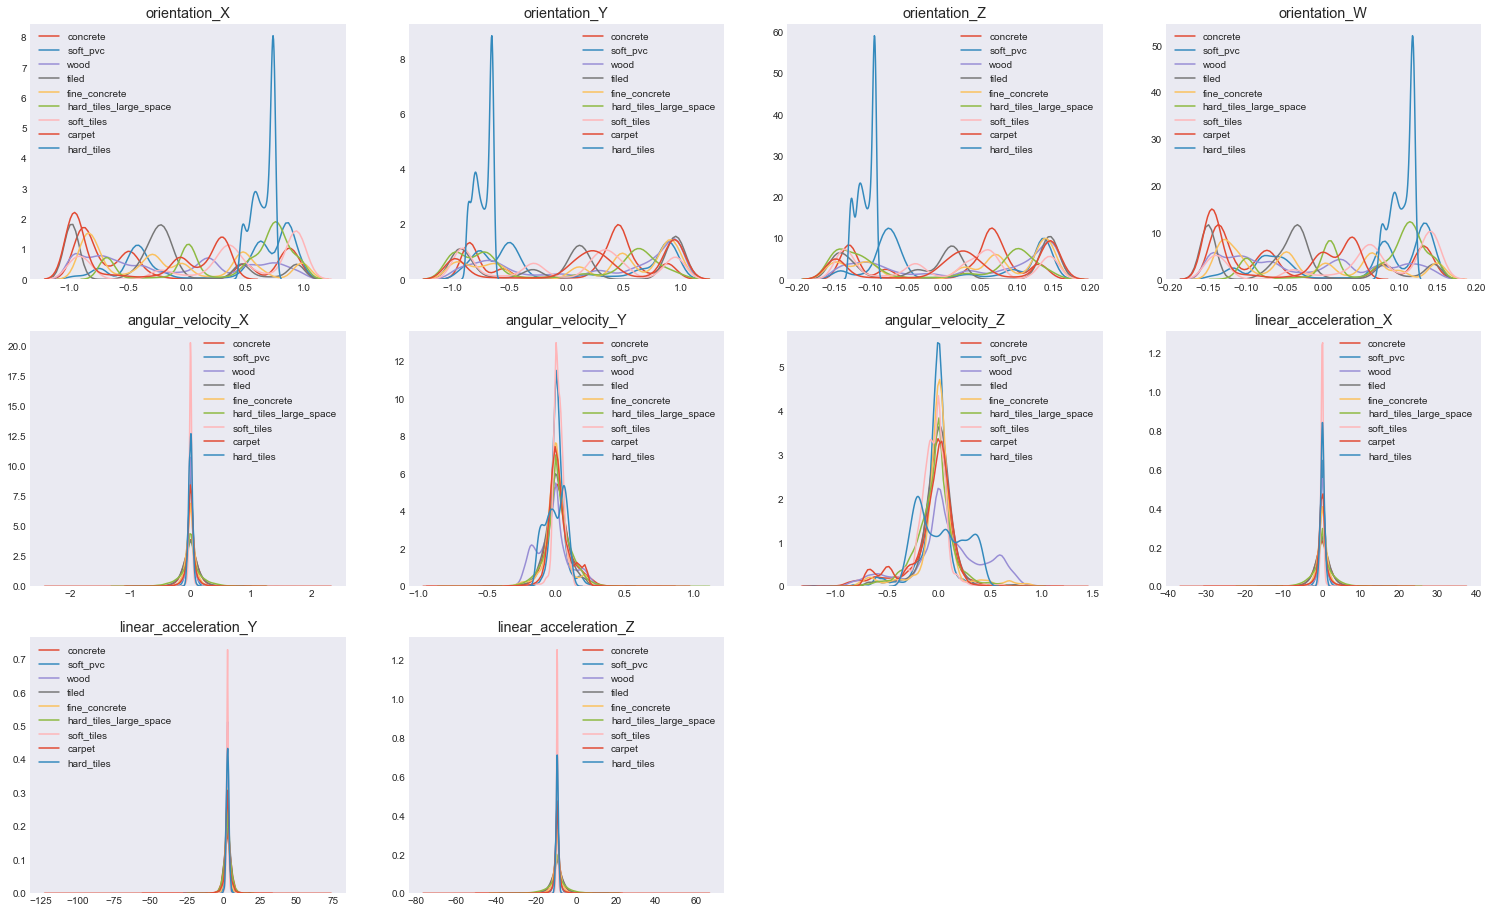

In [28]:
plt.figure(figsize=(26, 16))
for i,col in enumerate(df.columns[3:13]):
    ax = plt.subplot(3,4,i+1)
    ax = plt.title(col)
    for surface in targets:
        surface_feature = df[df['surface'] == surface]
        sns.kdeplot(surface_feature[col], label = surface)

**Observation:**

*     For hard tile surface we can see little jerk in orientation data.
*     for orientation_X these data range is approx 0.5 to 1.0, 
*     for orientation_Y these data range is approx -1.0 to -0.5
*     for orientation_Z these data range is approx -0.12 to -0.8
*     for orientation_W these data range is approx 0.07 to 0.12 
*     for angular velocity and linear accelaration data, there is a symmetry around mean in terms of data distribution.
    

## Feature Enginnering

Feature Enginnering is the process of using domain knowledge of the data to create features that make machine learning algorithms work.
Feature engineering is fundamental to the application of machine learning, and is both difficult and expensive.
The features in your data are important to the predictive models you use and will influence the results you are going to achieve. The quality and quantity of the features will have great influence on whether the model is good or not.

### Euler angles
The Euler angles are three angles introduced by Leonhard Euler to describe the orientation of a rigid body with respect to a fixed coordinate system.

### Fast Fourier Transform Denoising

In [29]:
series_dict = {}
for series in (X_train['series_id'].unique()):
    series_dict[series] = X_train[X_train['series_id'] == series] 

In [30]:
# From: Code Snippet For Visualizing Series Id by @shaz13
def plotSeries(series_id):
    style.use('ggplot')
    plt.figure(figsize=(28, 16))
    print(y_train[y_train['series_id'] == series_id]['surface'].values[0].title())
    for i, col in enumerate(series_dict[series_id].columns[3:]):
        if col.startswith("o"):
            color = 'red'
        elif col.startswith("a"):
            color = 'green'
        else:
            color = 'blue'
        if i >= 7:
            i+=1
        plt.subplot(3, 4, i + 1)
        plt.plot(series_dict[series_id][col], color=color, linewidth=3)
        plt.title(col)

Concrete


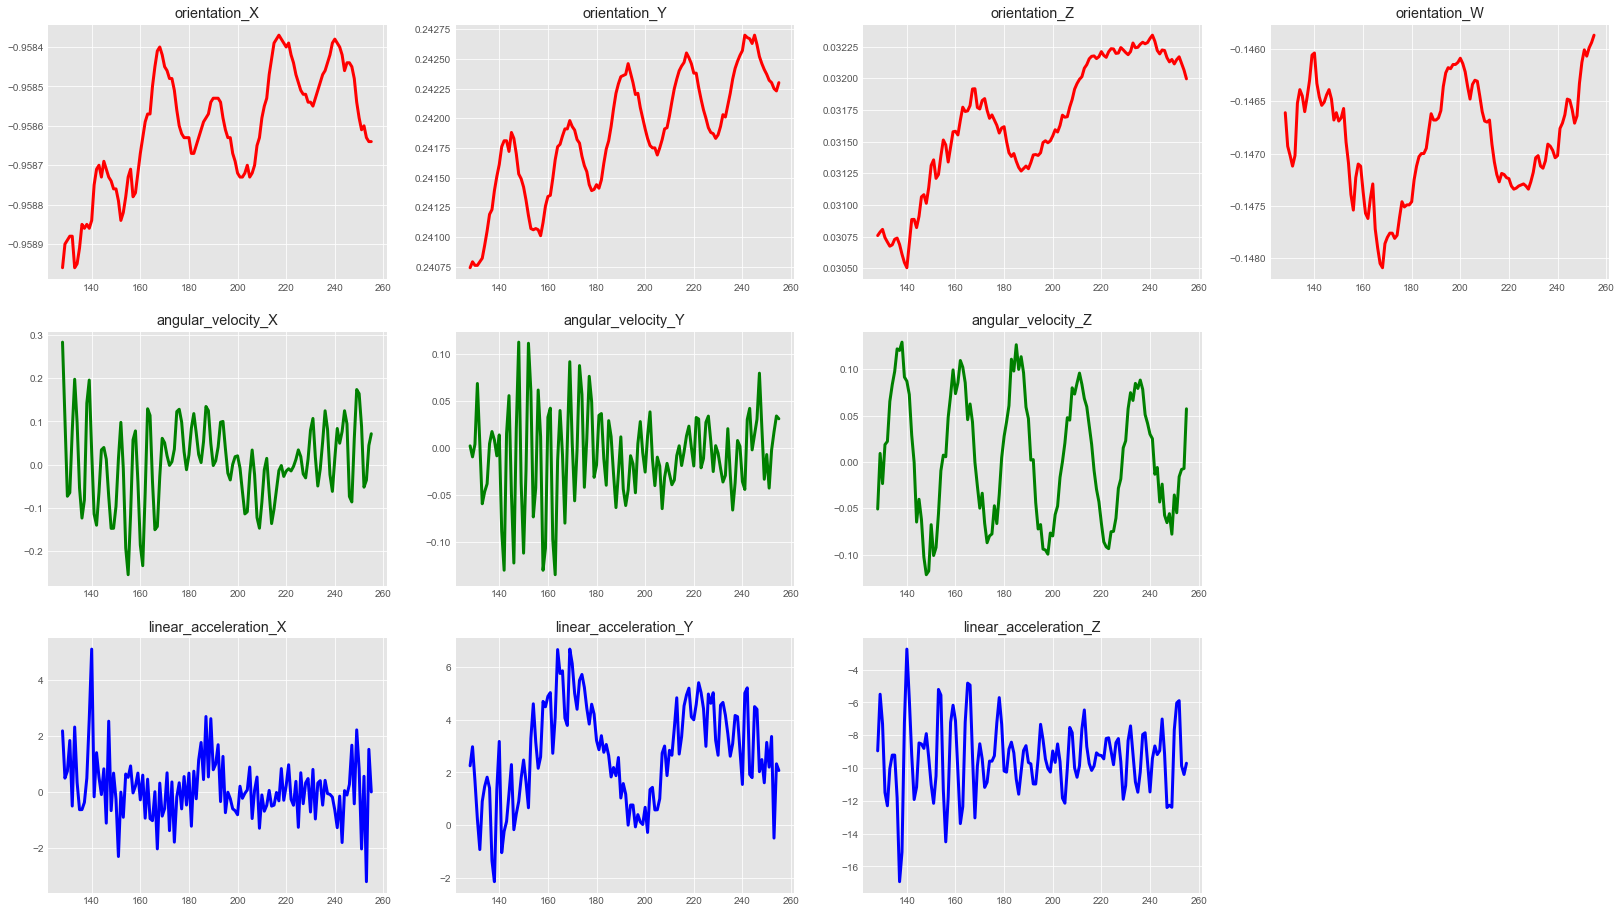

In [31]:
plotSeries(1)

Wood


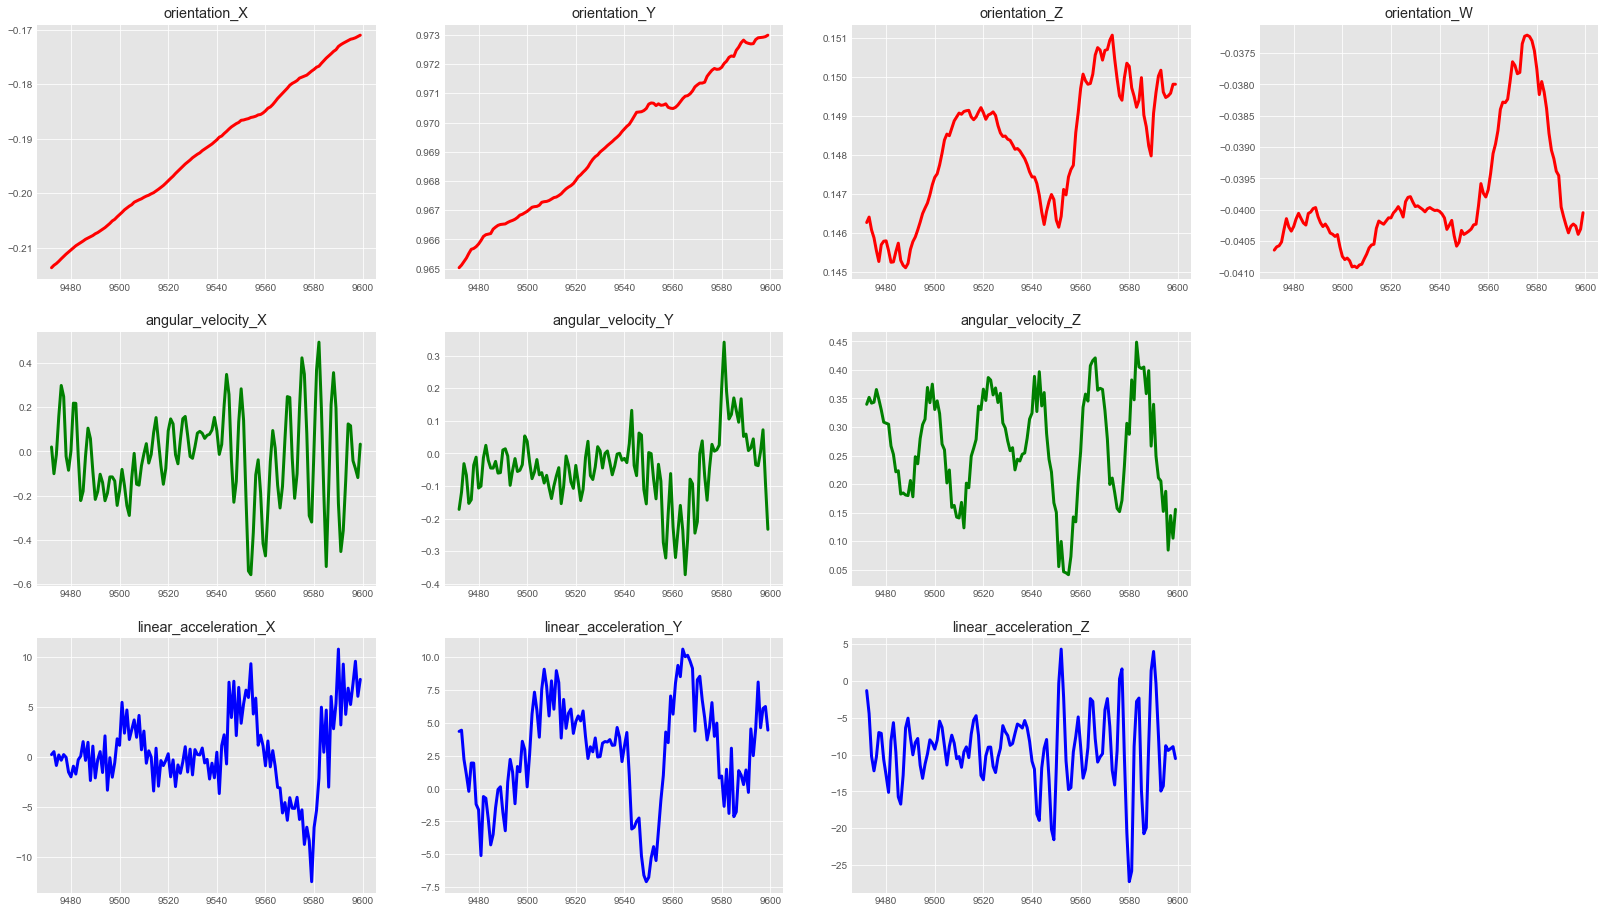

In [33]:
plotSeries(74)

If for whatever reason you want to denoise the signal, you can use fast fourier transform. Detailed implementation of how it's done is out of the scope of this kernel. You can learn more about it here: https://en.wikipedia.org/wiki/Fast_Fourier_transform

In [34]:
# from @theoviel at https://www.kaggle.com/theoviel/fast-fourier-transform-denoising
def filter_signal(signal, threshold=1e3):
    fourier = rfft(signal)
    frequencies = rfftfreq(signal.size, d=20e-3/signal.size)
    fourier[frequencies > threshold] = 0
    return irfft(fourier)

In [36]:
# denoise train and test angular_velocity and linear_acceleration data
X_train_denoised = X_train.copy()
# X_test_denoised = X_test.copy()

Let's say that I want to denoise the signal on angular_velocity and linear_acceleration column

In [37]:
X_train.head(3)

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267


In [39]:
X_train_denoised.head(3)

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267


In [40]:
from numpy.fft import *

# train
for col in X_train.columns:
    if col[0:3] == 'ang' or col[0:3] == 'lin':
        # Apply filter_signal function to the data in each series
        denoised_data = X_train.groupby(['series_id'])[col].apply(lambda x: filter_signal(x))
        
        # Assign the denoised data back to X_train
        list_denoised_data = []
        for arr in denoised_data:
            for val in arr:
                list_denoised_data.append(val)
                
        X_train_denoised[col] = list_denoised_data
        
# # test
# for col in X_test.columns:
#     if col[0:3] == 'ang' or col[0:3] == 'lin':
#         # Apply filter_signal function to the data in each series
#         denoised_data = X_test.groupby(['series_id'])[col].apply(lambda x: filter_signal(x))
        
#         # Assign the denoised data back to X_train
#         list_denoised_data = []
#         for arr in denoised_data:
#             for val in arr:
#                 list_denoised_data.append(val)
                
#         X_test_denoised[col] = list_denoised_data
        

Now, let's look at the result:

In [28]:
series_dict = {}
for series in (X_train_denoised['series_id'].unique()):
    series_dict[series] = X_train_denoised[X_train_denoised['series_id'] == series] 

Concrete


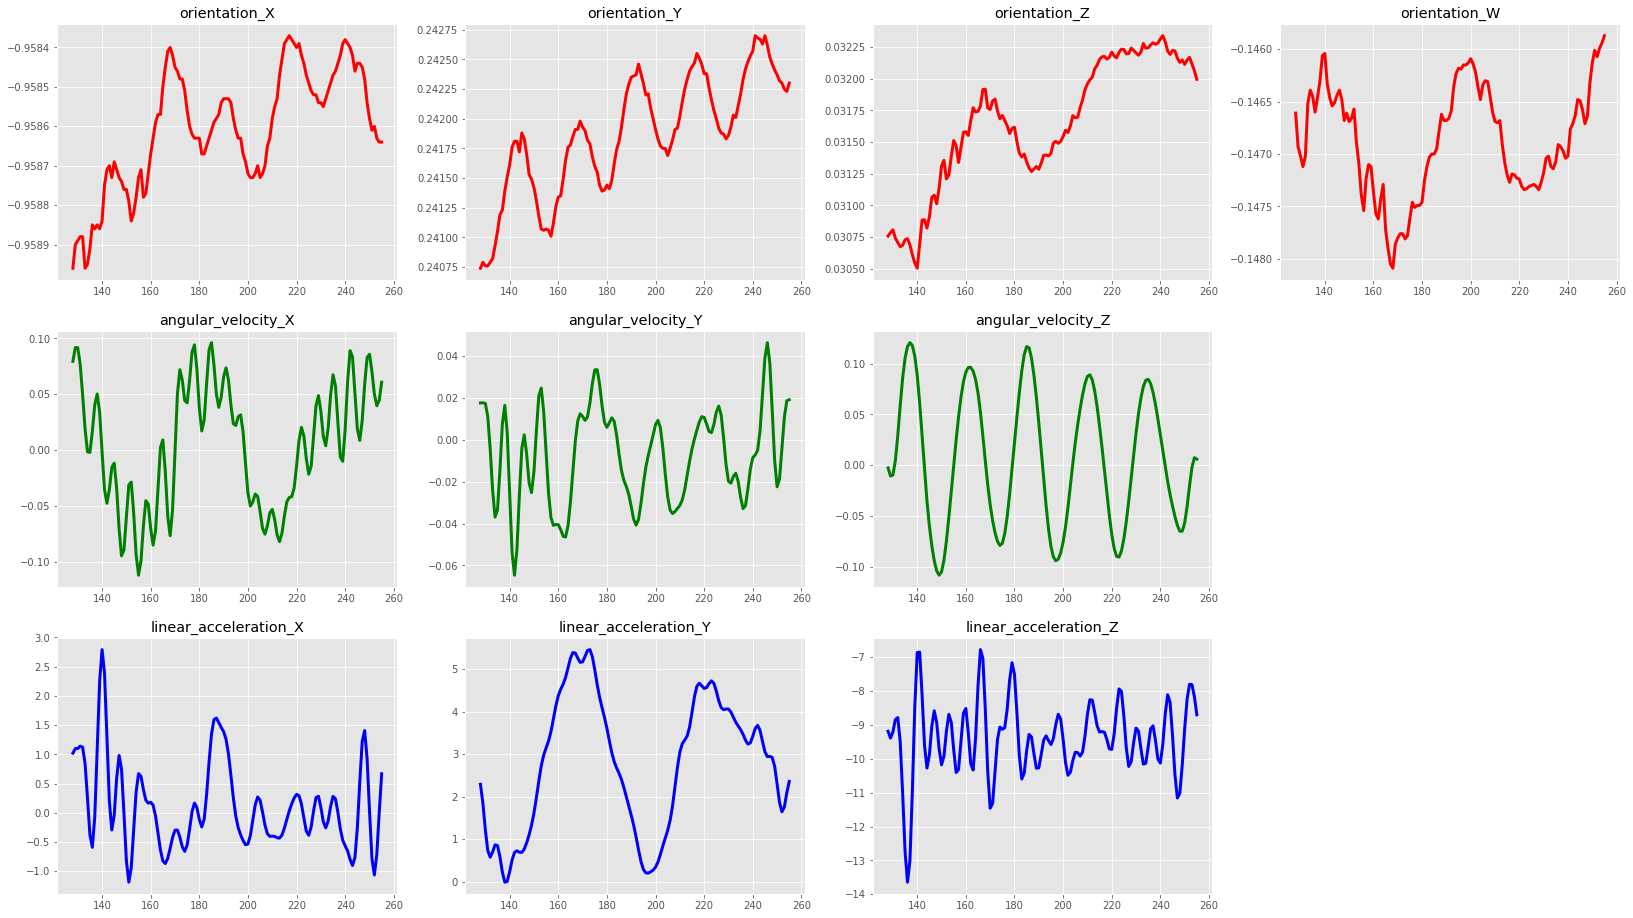

In [29]:
plotSeries(1)

As you can see, our signal become much smoother than before. Here's a closer comparison:

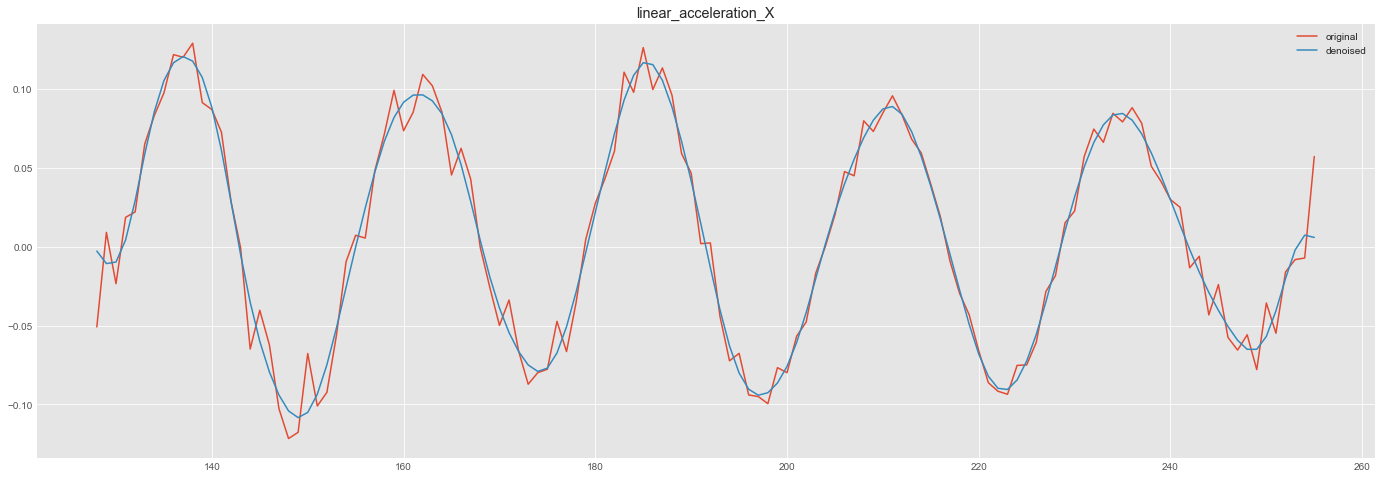

In [41]:
plt.figure(figsize=(24, 8))
plt.title('linear_acceleration_X')
plt.plot(X_train.angular_velocity_Z[128:256], label="original");
plt.plot(X_train_denoised.angular_velocity_Z[128:256], label="denoised");
plt.legend()
plt.show()

## Feature Enginnering
Feature Enginnering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. Feature engineering is fundamental to the application of machine learning, and is both difficult and expensive. The features in your data are important to the predictive models you use and will influence the results you are going to achieve. The quality and quantity of the features will have great influence on whether the model is good or not.

## Euler angles
The Euler angles are three angles introduced by Leonhard Euler to describe the orientation of a rigid body with respect to a fixed coordinate system.

In [42]:
#https://en.wikipedia.org/wiki/Conversion_between_quaternions_and_Euler_angles
#quaternion to eular
def quaternion_to_euler(qx,qy,qz,qw):
    import math
    # roll (x-axis rotation)
    sinr_cosp = +2.0 * (qw * qx + qy + qz)
    cosr_cosp = +1.0 - 2.0 * (qx * qx + qy * qy)
    roll = math.atan2(sinr_cosp, cosr_cosp)
    
    # pitch (y-axis rotation)
    sinp = +2.0 * (qw * qy - qz * qx)
    if(math.fabs(sinp) >= 1):
        pitch = copysign(M_PI/2, sinp)
    else:
        pitch = math.asin(sinp)
        
    # yaw (z-axis rotation)
    siny_cosp = +2.0 * (qw * qz + qx * qy)
    cosy_cosp = +1.0 - 2.0 * (qy * qy + qz * qz)
    yaw = math.atan2(siny_cosp, cosy_cosp)
    
    return roll, pitch, yaw

In [43]:
def eular_angle(data):
    x, y, z, w = data['orientation_X'].tolist(), data['orientation_Y'].tolist(), data['orientation_Z'].tolist(), data['orientation_W'].tolist()
    nx, ny, nz = [], [], []
    for i in range(len(x)):
        xx, yy, zz = quaternion_to_euler(x[i], y[i], z[i], w[i])
        nx.append(xx)
        ny.append(yy)
        nz.append(zz)
    
    data['euler_x'] = nx
    data['euler_y'] = ny
    data['euler_z'] = nz
    
    return data

In [48]:
data = eular_angle(X_train_denoised)
# test = eular_angle(X_test_denoised)
print(data.shape)

(487680, 16)


In [49]:
data.head(3)

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,euler_x,euler_y,euler_z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.064074,0.017639,0.005879,-0.347098,1.298076,-10.220717,-2.198206,-0.024668,1.396664
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.055530,0.026568,-0.000263,-0.096578,1.477298,-9.775386,-2.198203,-0.024662,1.396646
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.033545,0.026603,-0.003403,0.020569,1.574134,-9.616280,-2.198178,-0.024728,1.396682


### Feature Engineering
* calculate total angular velocity
* calculate total linear accelearation
* calculate total orientaion
* calculate acceleration vs velocity
* calculate total eular angle

In [35]:
def fe_eng1(data):
    data['total_angular_vel'] = (data['angular_velocity_X']**2 + data['angular_velocity_Y']**2 + data['angular_velocity_Z']**2)** 0.5
    data['total_linear_acc'] = (data['linear_acceleration_X']**2 + data['linear_acceleration_Y']**2 + data['linear_acceleration_Z']**2)**0.5
    data['total_orientation'] = (data['orientation_X']**2 + data['orientation_Y']**2 + data['orientation_Z']**2)**0.5
    data['acc_vs_vel'] = data['total_linear_acc'] / data['total_angular_vel']
    data['total_angle'] = (data['euler_x'] ** 2 + data['euler_y'] ** 2 + data['euler_z'] ** 2) ** 5
    data['angle_vs_acc'] = data['total_angle'] / data['total_linear_acc']
    data['angle_vs_vel'] = data['total_angle'] / data['total_angular_vel']
    return data

In [36]:
data = fe_eng1(data)
test = fe_eng1(test)
print(data.shape, test.shape)

(487680, 23) (488448, 23)


In [37]:
def fe_eng2(data):
    df = pd.DataFrame()
    
    for col in data.columns:
        if col in ['row_id','series_id','measurement_number']:
            continue
        df[col + '_mean'] = data.groupby(['series_id'])[col].mean()
        df[col + '_median'] = data.groupby(['series_id'])[col].median()
        df[col + '_max'] = data.groupby(['series_id'])[col].max()
        df[col + '_min'] = data.groupby(['series_id'])[col].min()
        df[col + '_std'] = data.groupby(['series_id'])[col].std()
        df[col + '_range'] = df[col + '_max'] - df[col + '_min']
        df[col + '_maxtoMin'] = df[col + '_max'] / df[col + '_min']
        #in statistics, the median absolute deviation (MAD) is a robust measure of the variablility of a univariate sample of quantitative data.
        df[col + '_mad'] = data.groupby(['series_id'])[col].apply(lambda x: np.median(np.abs(np.diff(x))))
        df[col + '_abs_max'] = data.groupby(['series_id'])[col].apply(lambda x: np.max(np.abs(x)))
        df[col + '_abs_min'] = data.groupby(['series_id'])[col].apply(lambda x: np.min(np.abs(x)))
        df[col + '_abs_avg'] = (df[col + '_abs_min'] + df[col + '_abs_max'])/2
    return df

In [38]:
%%time
data = fe_eng2(data)
test = fe_eng2(test)
print(data.shape, test.shape)

(3810, 220) (3816, 220)
CPU times: user 2min 6s, sys: 500 ms, total: 2min 7s
Wall time: 2min 6s


In [39]:
data.head(3)

,orientation_X_mean,orientation_X_median,orientation_X_max,orientation_X_min,orientation_X_std,orientation_X_range,orientation_X_maxtoMin,orientation_X_mad,orientation_X_abs_max,orientation_X_abs_min,orientation_X_abs_avg,orientation_Y_mean,orientation_Y_median,orientation_Y_max,orientation_Y_min,orientation_Y_std,orientation_Y_range,orientation_Y_maxtoMin,orientation_Y_mad,orientation_Y_abs_max,orientation_Y_abs_min,orientation_Y_abs_avg,orientation_Z_mean,orientation_Z_median,orientation_Z_max,orientation_Z_min,orientation_Z_std,orientation_Z_range,orientation_Z_maxtoMin,orientation_Z_mad,orientation_Z_abs_max,orientation_Z_abs_min,orientation_Z_abs_avg,orientation_W_mean,orientation_W_median,orientation_W_max,orientation_W_min,orientation_W_std,orientation_W_range,orientation_W_maxtoMin,...,acc_vs_vel_std,acc_vs_vel_range,acc_vs_vel_maxtoMin,acc_vs_vel_mad,acc_vs_vel_abs_max,acc_vs_vel_abs_min,acc_vs_vel_abs_avg,total_angle_mean,total_angle_median,total_angle_max,total_angle_min,total_angle_std,total_angle_range,total_angle_maxtoMin,total_angle_mad,total_angle_abs_max,total_angle_abs_min,total_angle_abs_avg,angle_vs_acc_mean,angle_vs_acc_median,angle_vs_acc_max,angle_vs_acc_min,angle_vs_acc_std,angle_vs_acc_range,angle_vs_acc_maxtoMin,angle_vs_acc_mad,angle_vs_acc_abs_max,angle_vs_acc_abs_min,angle_vs_acc_abs_avg,angle_vs_vel_mean,angle_vs_vel_median,angle_vs_vel_max,angle_vs_vel_min,angle_vs_vel_std,angle_vs_vel_range,angle_vs_vel_maxtoMin,angle_vs_vel_mad,angle_vs_vel_abs_max,angle_vs_vel_abs_min,angle_vs_vel_abs_avg
series_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.758666,-0.758530,-0.75822,-0.75953,0.000363,0.00131,0.998275,0.00001,0.75953,0.75822,0.758875,-0.634008,-0.63427,-0.63306,-0.63456,0.000471,0.00150,0.997636,0.00002,0.63456,0.63306,0.633810,-0.105474,-0.105500,-0.104610,-0.106140,0.000432,0.001530,0.985585,0.000040,0.106140,0.104610,0.105375,-0.106470,-0.106555,-0.105590,-0.107050,0.000389,0.001460,0.986362,...,106.995915,744.327462,10.232186,33.130260,824.950565,80.623103,452.786834,14338.516346,14339.876949,14364.062506,14301.549842,18.300217,62.512664,1.004371,1.365872,14364.062506,14301.549842,14332.806174,1454.697333,1443.121684,1777.164960,1236.082328,109.258565,541.082632,1.437740,52.475779,1777.164960,1236.082328,1506.623644,340424.428631,302261.626030,1.173682e+06,129863.053959,146606.479293,1.043819e+06,9.037843,49024.849734,1.173682e+06,129863.053959,6.517725e+05
1,-0.958606,-0.958595,-0.95837,-0.95896,0.000151,0.00059,0.999385,0.00002,0.95896,0.95837,0.958665,0.241867,0.24189,0.24270,0.24074,0.000499,0.00196,1.008142,0.00007,0.24270,0.24074,0.241720,0.031650,0.031688,0.032341,0.030504,0.000508,0.001837,1.060222,0.000035,0.032341,0.030504,0.031423,-0.146876,-0.146910,-0.145870,-0.148090,0.000521,0.002220,0.985009,...,48.486938,247.475945,4.893315,16.245147,311.040267,63.564322,187.302295,8673.533082,8674.326626,8768.817506,8602.249950,42.552735,166.567556,1.019363,4.673126,8768.817506,8602.249950,8685.533728,880.987089,872.116304,1201.849511,639.602399,93.341638,562.247112,1.879057,39.931050,1201.849511,639.602399,920.725955,112665.474125,101401.977361,2.371102e+05,57328.893020,39284.819929,1.797813e+05,4.135964,14660.566016,2.371102e+05,57328.893020,1.472196e+05
2,-0.512057,-0.512035,-0.50944,-0.51434,0.001377,0.00490,0.990473,0.00004,0.51434,0.50944,0.511890,-0.846171,-0.84621,-0.84490,-0.84779,0.000785,0.00289,0.996591,0.00002,0.84779,0.84490,0.846345,-0.129371,-0.129405,-0.128520,-0.130300,0.000541,0.001780,0.986339,0.000050,0.130300,0.128520,0.129410,-0.071082,-0.071139,-0.070378,-0.071535,0.000278,0.001157,0.983826,...,125.015838,776.341372,10.830719,23.918416,855.312337,78.970965,467.141651,41626.149584,41637.578558,42175.648724,41202.266064,264.554337,973.382660,1.023624,6.916536,42175.648724,41202.266064,41688.957394,4187.140848,4154.168421,5276.421117,3462.688258,290.207149,1813.732860,1.523793,104.407765,5276.421117,3462.688258,4369.554688,897

#### Observation:
Now our data file sample size is same as target sample size. our test file sample size is same as number of requested series_ids.

In [40]:
data.fillna(0, inplace = True)
data.replace(-np.inf, 0, inplace = True)
data.replace(np.inf, 0, inplace = True)
test.fillna(0, inplace = True)
test.replace(-np.inf, 0, inplace = True)
test.replace(np.inf, 0, inplace = True)

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train['surface'] = le.fit_transform(y_train['surface'])

In [42]:
y_train.head()

,series_id,group_id,surface
0,0,13,2
1,1,31,1
2,2,20,1
3,3,31,1
4,4,22,6


## Run Model:
#### As this is a multi class classification problem. Lets try Random Forest Classifier algorithm.

In [43]:
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=60)
predicted = np.zeros((test.shape[0],9))
measured= np.zeros((data.shape[0]))
score = 0

In [44]:
for times, (trn_idx, val_idx) in enumerate(folds.split(data.values,y_train['surface'].values)):
    model = RandomForestClassifier(n_estimators=700, n_jobs = -1)
    #model = RandomForestClassifier(n_estimators=500, max_depth=10, min_samples_split=5, n_jobs=-1)
    model.fit(data.iloc[trn_idx],y_train['surface'][trn_idx])
    measured[val_idx] = model.predict(data.iloc[val_idx])
    predicted += model.predict_proba(test)/folds.n_splits
    score += model.score(data.iloc[val_idx],y_train['surface'][val_idx])
    print("Fold: {} score: {}".format(times,model.score(data.iloc[val_idx],y_train['surface'][val_idx])))
    
    gc.collect()

Fold: 0 score: 0.9090909090909091
Fold: 1 score: 0.9140625
Fold: 2 score: 0.9295039164490861
Fold: 3 score: 0.9267015706806283
Fold: 4 score: 0.8818897637795275
Fold: 5 score: 0.8976377952755905
Fold: 6 score: 0.9186351706036745
Fold: 7 score: 0.9182058047493403
Fold: 8 score: 0.9259259259259259
Fold: 9 score: 0.9175531914893617


In [45]:
print('Average score', score / folds.n_splits)

Average score 0.9139206548044043


In [46]:
confusion_matrix(measured,y_train['surface'])

array([[156,   5,   0,   0,   4,   1,   0,   2,   1],
       [ 15, 711,  12,   0,  12,  12,   6,  20,  13],
       [  0,   8, 325,   0,   4,   7,   1,   0,   5],
       [  0,   0,   0,  15,   0,   0,   0,   0,   0],
       [  0,   3,   1,   0, 280,   6,   0,   2,   0],
       [  4,  17,   4,   0,   2, 684,   5,   3,  16],
       [  3,   7,   1,   1,   1,   6, 279,   7,   1],
       [  1,  15,   4,   0,   0,   2,   1, 474,  13],
       [ 10,  13,  16,   5,   5,  14,   5,   6, 558]])

Text(0.5, 24.0, 'Predicted label')

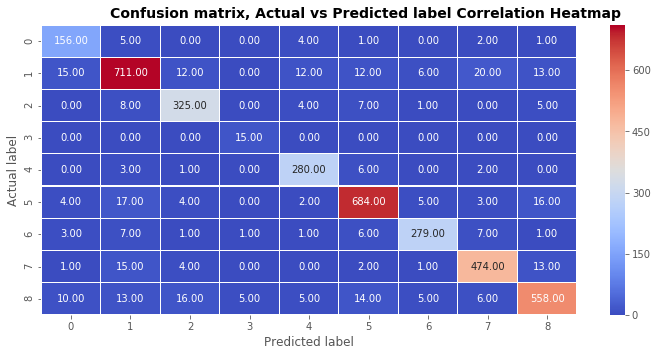

In [47]:
fig, ax = plt.subplots(1,1,figsize=(12,5))
sns.heatmap(pd.DataFrame(confusion_matrix(measured,y_train['surface'])),
            ax = ax,
            cmap = 'coolwarm',
            annot = True,
            fmt = '.2f',
            linewidths = 0.05)
fig.subplots_adjust(top=0.93)
fig.suptitle('Confusion matrix, Actual vs Predicted label Correlation Heatmap', 
              fontsize=14, 
              fontweight='bold')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Feature Importance**

Understanding about important features will help us fine tuning feature enginnering as well accuracy improvement.

In [48]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis = 0)
indices = np.argsort(importances)[::-1]

In [49]:
feature_importances = pd.DataFrame(importances, index = data.columns, columns = ['importance'])
feature_importances.sort_values('importance', ascending = False)
feature_importances.head(20)

,importance
orientation_X_mean,0.011178
orientation_X_median,0.012847
orientation_X_max,0.012674
orientation_X_min,0.012100
orientation_X_std,0.002291
orientation_X_range,0.002392
orientation_X_maxtoMin,0.006277
orientation_X_mad,0.001800
orientation_X_abs_max,0.004782
orientation_X_abs_min,0.004730


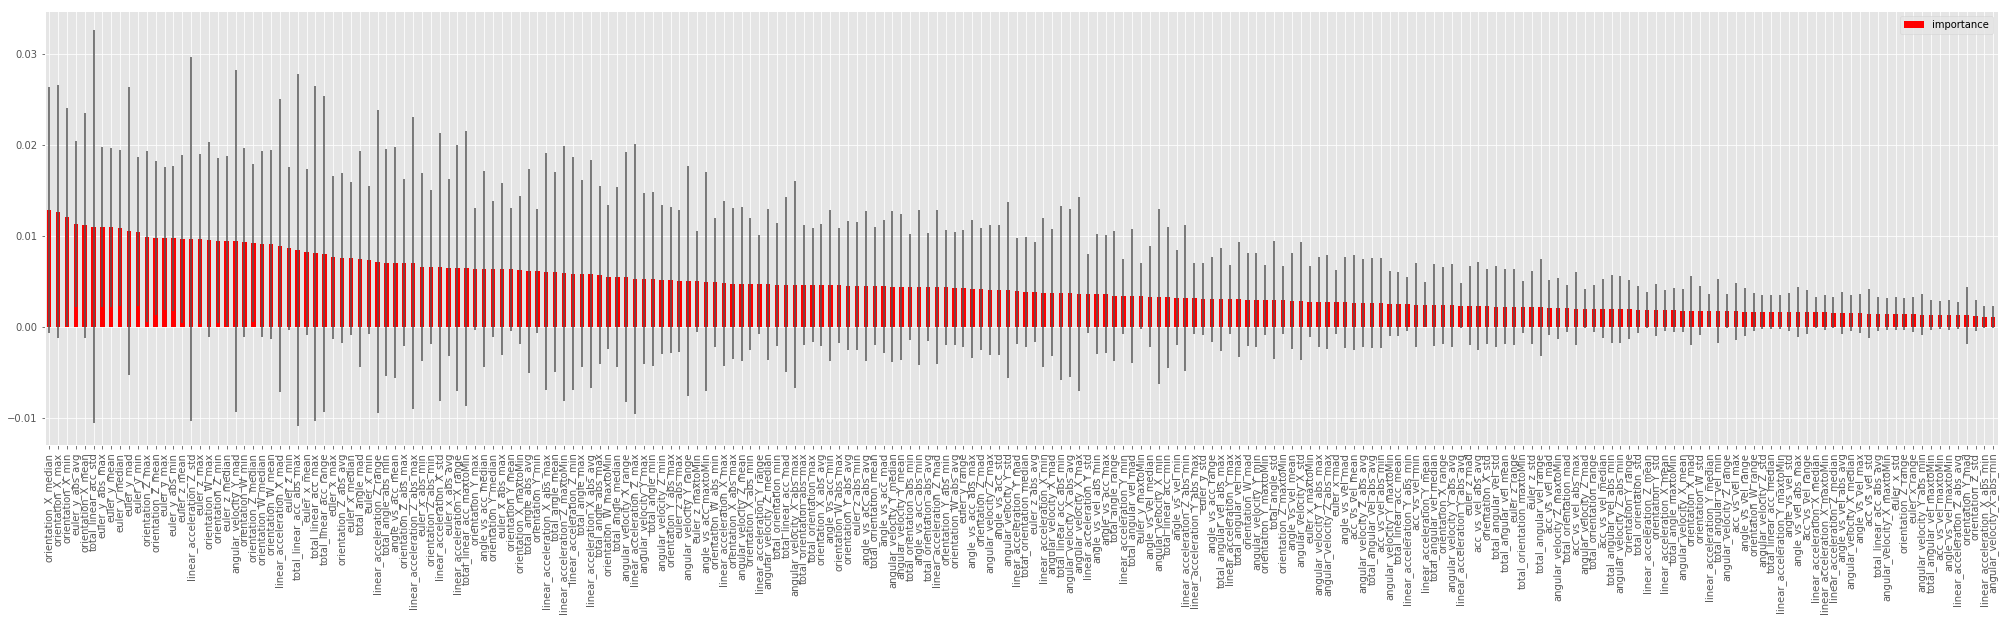

In [50]:
feature_importances.sort_values('importance', ascending = False).plot(kind = 'bar', 
                         figsize = (35,8), 
                         color = 'r', 
                         yerr=std[indices], 
                        align = 'center')
plt.xticks(rotation=90)
plt.show()

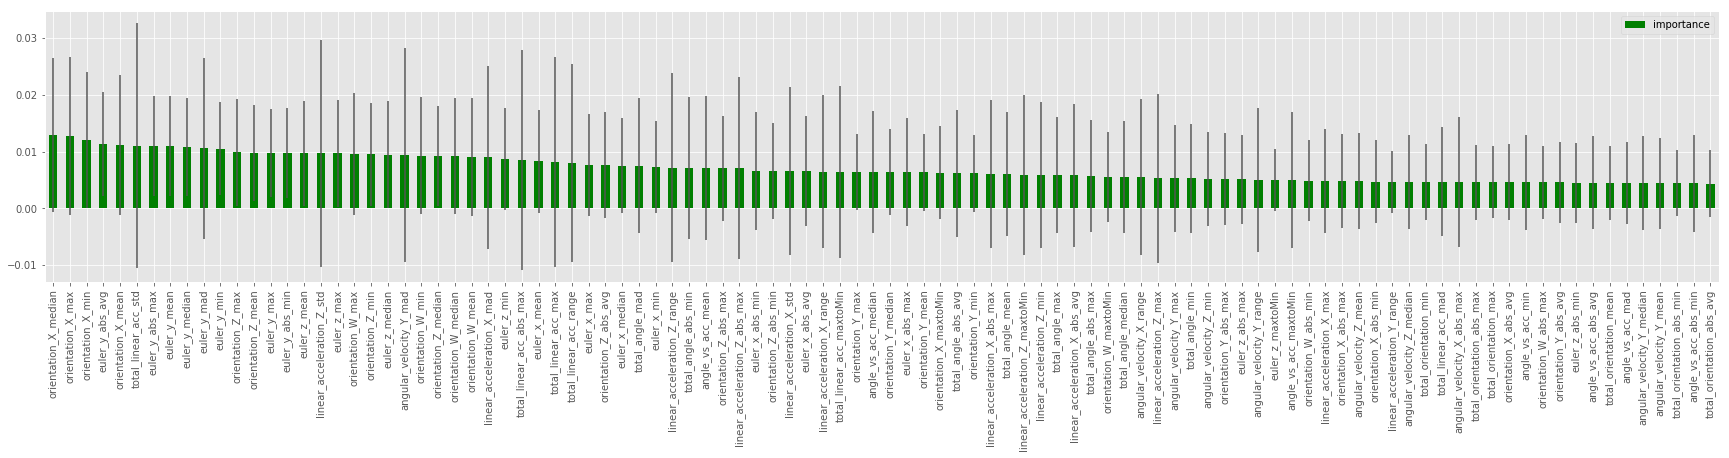

In [51]:
feature_importances.sort_values('importance', ascending = False)[:100].plot(kind = 'bar',
                                                                            figsize = (30,5),
                                                                            color = 'g', 
                                                                            yerr=std[indices[:100]], 
                                                                            align = 'center')
plt.xticks(rotation=90)
plt.show()

In [52]:
less_important_features = feature_importances.loc[feature_importances['importance'] < 0.0025]
print('There are {0} features their importance value is less then 0.0025'.format(less_important_features.shape[0]))

There are 66 features their importance value is less then 0.0025


In [53]:
#Remove less important features from train and test set.
for i, col in enumerate(less_important_features.index):
    data = data.drop(columns = [col], axis = 1)
    test = test.drop(columns = [col], axis = 1)
    
data.shape, test.shape

((3810, 154), (3816, 154))

### Run ML Model Again

In [54]:
predicted = np.zeros((test.shape[0],9))
measured= np.zeros((data.shape[0]))
score = 0
for times, (trn_idx, val_idx) in enumerate(folds.split(data.values,y_train['surface'].values)):
    model = RandomForestClassifier(n_estimators=700, n_jobs = -1)
    #model = RandomForestClassifier(n_estimators=500, max_depth=10, min_samples_split=5, n_jobs=-1)
    model.fit(data.iloc[trn_idx],y_train['surface'][trn_idx])
    measured[val_idx] = model.predict(data.iloc[val_idx])
    predicted += model.predict_proba(test)/folds.n_splits
    score += model.score(data.iloc[val_idx],y_train['surface'][val_idx])
    print("Fold: {} score: {}".format(times,model.score(data.iloc[val_idx],y_train['surface'][val_idx])))
    
    gc.collect()

Fold: 0 score: 0.9168831168831169
Fold: 1 score: 0.9270833333333334
Fold: 2 score: 0.9164490861618799
Fold: 3 score: 0.9267015706806283
Fold: 4 score: 0.889763779527559
Fold: 5 score: 0.905511811023622
Fold: 6 score: 0.9133858267716536
Fold: 7 score: 0.9129287598944591
Fold: 8 score: 0.9338624338624338
Fold: 9 score: 0.9228723404255319


In [55]:
print('Average score', score / folds.n_splits)

Average score 0.9165442058564219


**Observation:**

Looks like orientation features are Most important features. we can do further feature engineering around Orientation Feature. Lets remove low importance features and then run the model.

In [56]:
submission = pd.read_csv('../input/sample_submission.csv')
submission['surface'] = le.inverse_transform(predicted.argmax(axis=1))
submission.to_csv('rs_surface_submission6.csv', index=False)
submission.head(10)

,series_id,surface
0,0,hard_tiles_large_space
1,1,carpet
2,2,tiled
3,3,soft_tiles
4,4,soft_tiles
5,5,concrete
6,6,concrete
7,7,concrete
8,8,wood
9,9,wood


Ref:

feature engg kernel1: https://www.kaggle.com/jesucristo/1-robots-eda-rf-cval-0-73
kernel 2: https://www.kaggle.com/willkoehrsen/automated-feature-engineering-basics/notebook

feature importance: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

median absolute deviation: https://en.wikipedia.org/wiki/Median_absolute_deviation
Quaternions and 3rd rotation, explained interactively: https://www.youtube.com/watch?v=zjMuIxRvygQ https://en.wikipedia.org/wiki/Conversion_between_quaternions_and_Euler_angles

Thanks for stopping by. Please upvote if you like my kernel. 
Stay Tuned for further Analaysis and model accuracy improvement.